In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

from keras import layers
from keras import models
from keras import optimizers
from keras.layers.core import Activation


import numpy as np

/home/sara/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sara/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/sara/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sara/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sara/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype s

In [2]:
img_width, img_height = 300, 300

train_dir = 'data/flowers'

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


In [4]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode='nearest',
    horizontal_flip=True,
    validation_split=0.25)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    batch_size=2,
    class_mode='categorical',
    subset="training")

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    batch_size=2,
    class_mode='categorical',
    subset = "validation")



Found 3243 images belonging to 5 classes.
Found 1080 images belonging to 5 classes.


In [5]:
train_generator.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [6]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [7]:
train_generator.num_classes

5

In [8]:
train_generator.data_format

'channels_last'

In [9]:
train_generator.image_shape

(300, 300, 1)

In [10]:
train_generator.samples

3243

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(300, 300, 1)))

convout1 = Activation('relu')
model.add(convout1)

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
__________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=400,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/2
400/400 [==============================] - 220s 550ms/step - loss: 1.6104 - acc: 0.2438 - val_loss: 1.6027 - val_acc: 0.2600
Epoch 2/2
400/400 [==============================] - 202s 506ms/step - loss: 1.6051 - acc: 0.2337 - val_loss: 1.6003 - val_acc: 0.2600


In [14]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Test Score: ', score[0])
print ('Test Accuracy: ',score[1])

Test Score:  1.6098851895332336
Test Accuracy:  0.27


In [15]:
import cv2
import matplotlib.pyplot as plt
img_to_visualize1 = cv2.imread('data/flowers/dandelion/15987457_49dc11bf4b.jpg',0)

In [16]:
img_to_visualize1=np.expand_dims(img_to_visualize1,axis=2)
print(img_to_visualize1.shape)

(375, 500, 1)


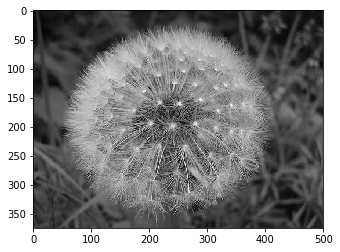

In [17]:
plt.imshow(np.squeeze(img_to_visualize1), cmap='gray')

In [18]:
#img_to_visualize=img_to_visualize.transpose()
img_to_visualize1 = np.expand_dims(img_to_visualize1, axis=0)

In [19]:
print(img_to_visualize1.shape)

(1, 375, 500, 1)


In [20]:
def layer_to_visualize(layer, img_to_visualize):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)

    n = convolutions.shape[0]
    n = 4
    n = int(np.ceil(np.sqrt(n)))

    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions))[:4]:
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')


Shape of conv: (45, 60, 128)


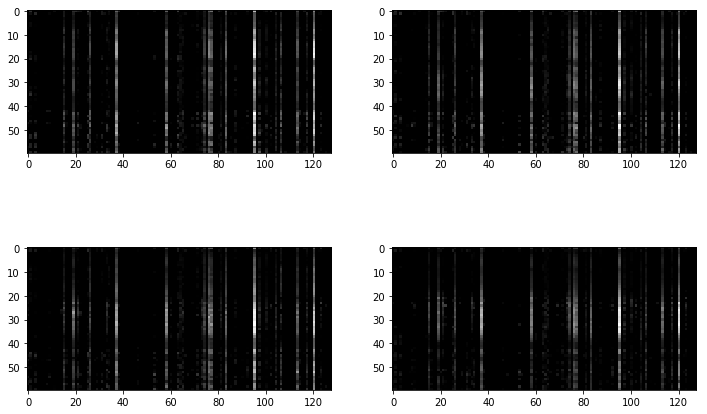

In [21]:
layer_to_visualize(model.layers[6], img_to_visualize1)

In [22]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 conv2d_1
1 activation_1
2 max_pooling2d_1
3 conv2d_2
4 max_pooling2d_2
5 conv2d_3
6 max_pooling2d_3
7 conv2d_4
8 max_pooling2d_4
9 flatten_1
10 dense_1
11 dense_2
